In [1]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 67.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import sklearn
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
feat = abalone.data.features
tar = abalone.data.targets

In [ ]:
aba = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/dataset/abalone.csv'))
aba.head()
aba.info()
aba.shape
aba.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
aba_dup = aba.copy()
aba_dup.info()
aba_dup.head()
aba_dup.shape
aba_dup.describe()
print("Percentage of Null Values of aba Features:")
round(100*(aba_dup.isnull().sum()/len(aba_dup)), 2).sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
Percentage of Null Values of aba Features:


Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
dtype: float64

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [ ]:
aba_dup.drop_duplicates(subset = None, inplace = True)

In [ ]:
feat = feat.drop(columns=["Sex"])

      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  
0           0.1500

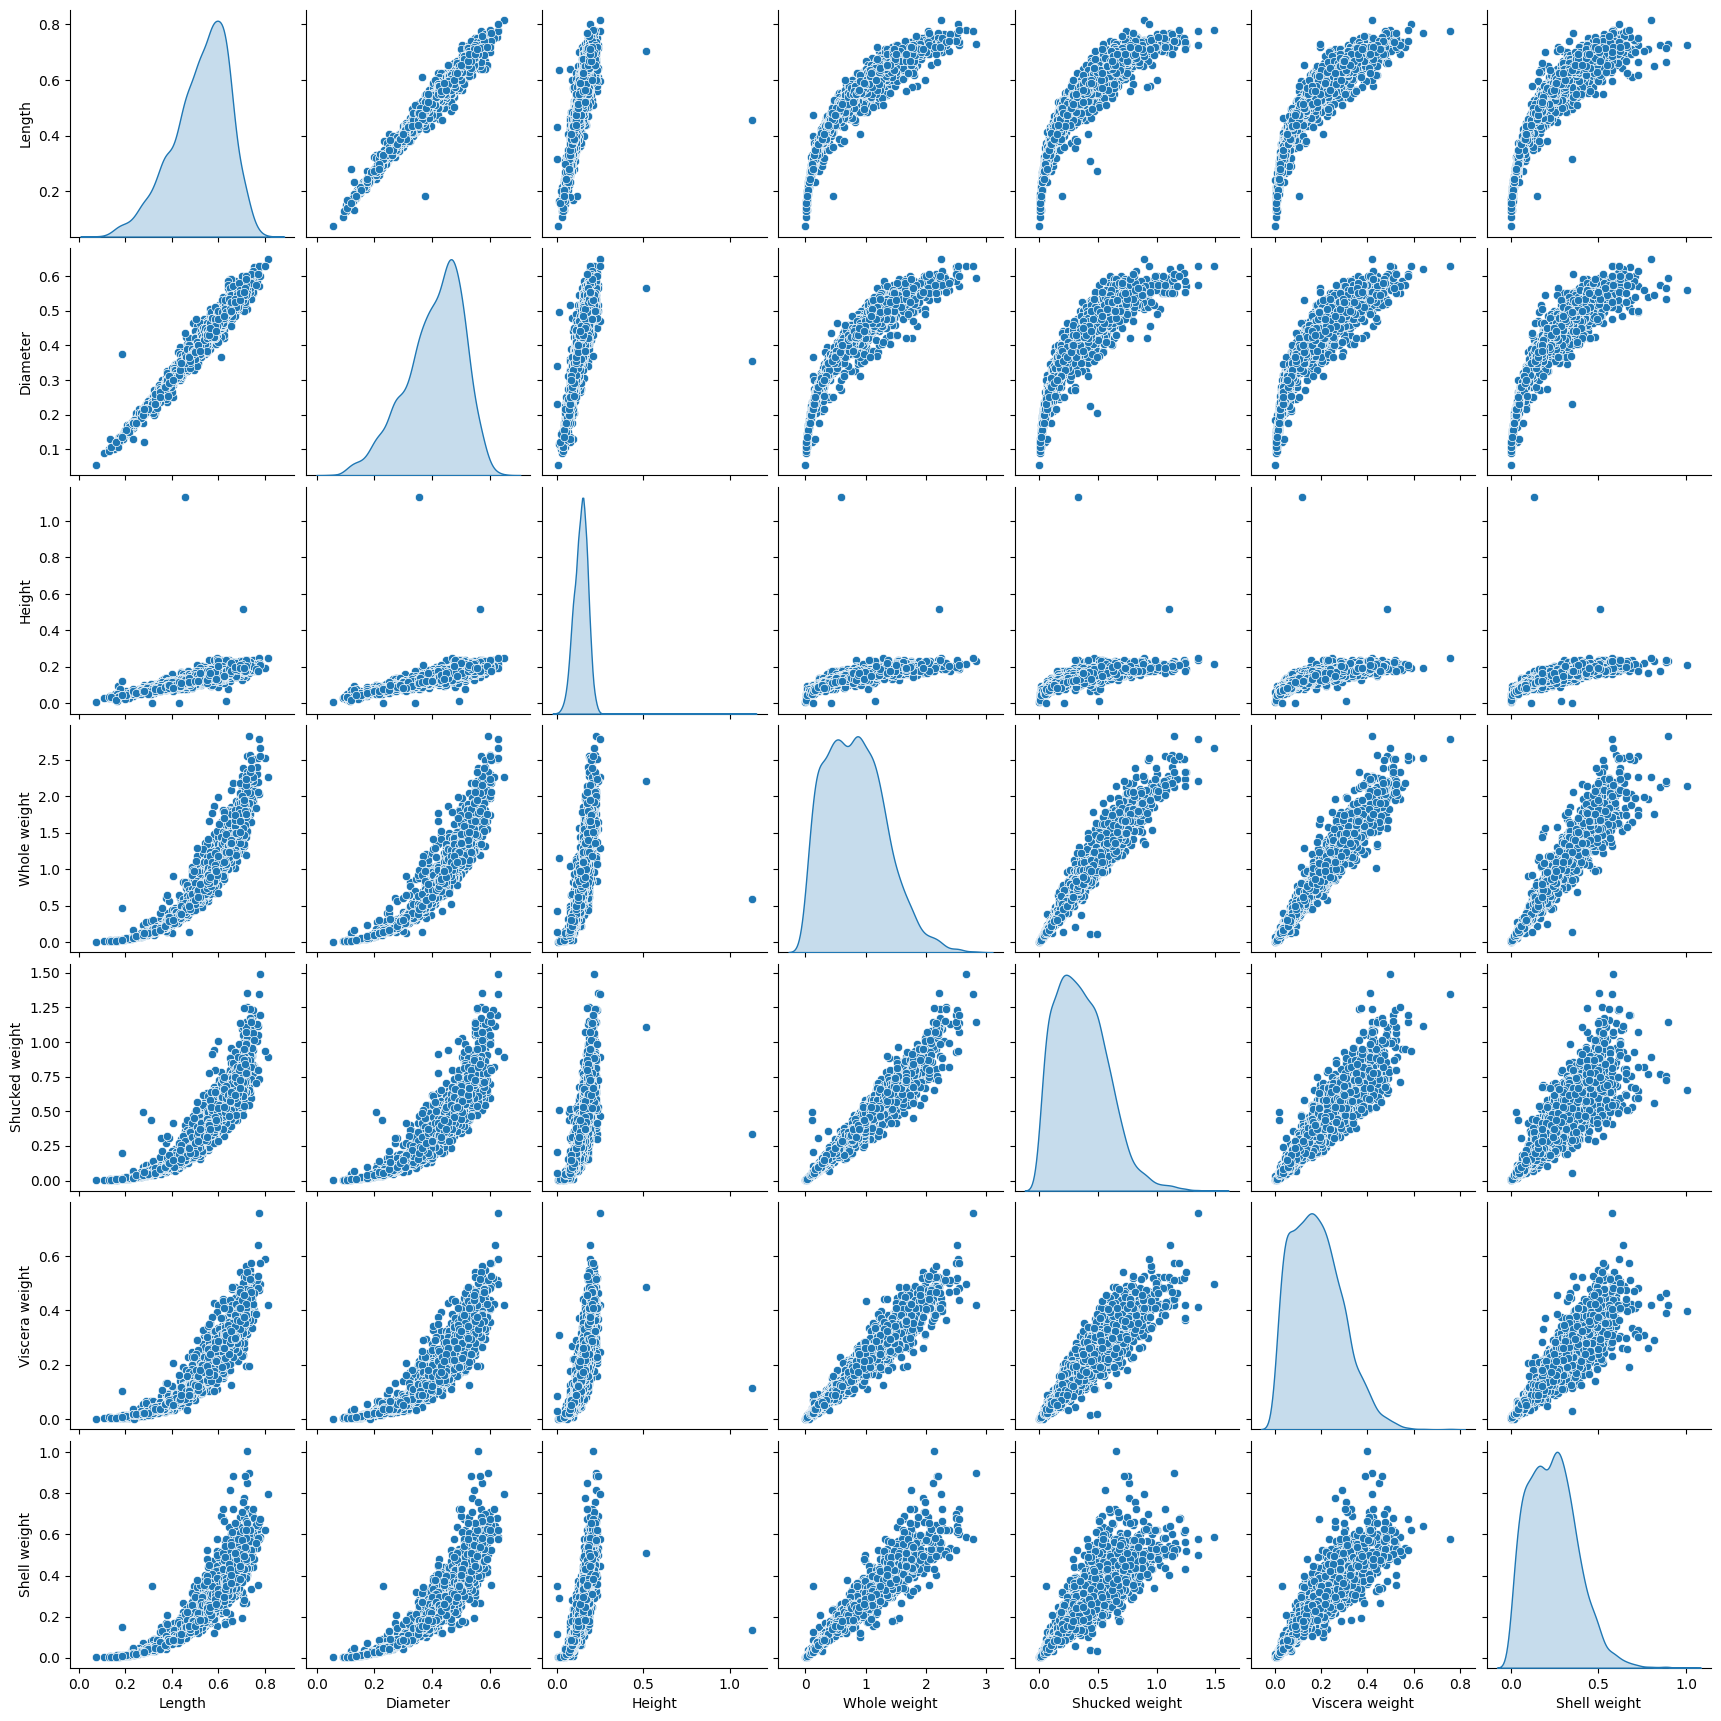

In [ ]:
feat = aba_dup[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
tar = aba_dup['Rings']

feat.head()
feat.describe()
tar.head()
tar.describe()
print(feat, tar)
sns.pairplot(feat, diag_kind='kde')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feat, tar, train_size = 0.7, test_size = 0.3, random_state = 100)

model = LinearRegression()
sca = StandardScaler()

pipe = make_pipeline(
  sca,
    model
)

X_train_scaled = sca.fit_transform(X_train)
X_test_scaled = sca.transform(X_test)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

results = pipe.score(X_test, y_test)
print(results)

mean_se = mean_squared_error(y_test, y_pred)
root_mean_se = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test, y_pred))
print("R2: %.2f" % r2_score(y_test, y_pred))

0.5231776791553059
Mean squared error: 5.04
Root mean squared error: 2.25
R2: 0.52


In [ ]:
joblib.dump(pipe, '/content/linreg_stanscale.joblib')

['/content/linreg_stanscale.joblib']

In [ ]:
reg = joblib.load('/content/linreg_stanscale.joblib')
print(r2_score(y_test, y_pred))

0.5231776791553059


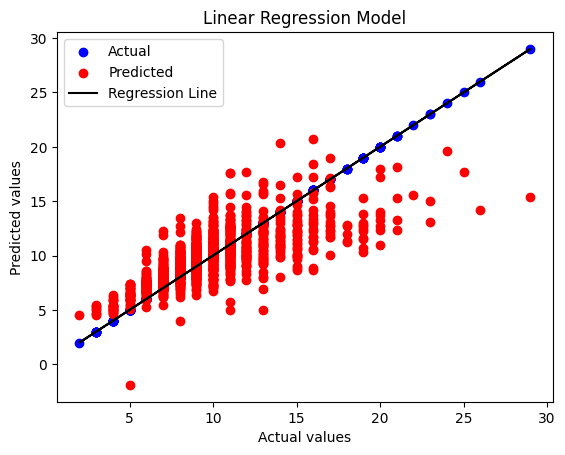

In [ ]:
def linear_regression(y_test, y_pred):
  plt.scatter(y_test, y_test, color='blue', label='Actual')
  plt.scatter(y_test, y_pred, color='red', label='Predicted')
  plt.plot(y_test, y_test, color='black', label='Regression Line')
  plt.title('Linear Regression Model')
  plt.xlabel('Actual values')
  plt.ylabel('Predicted values')
  plt.legend()

linear_regression(y_test, y_pred)

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feat, tar, train_size = 0.7, test_size = 0.3, random_state = 100)

model3 = RandomForestRegressor(n_estimators=100, random_state=100)
sca = StandardScaler()

model3_pipe = make_pipeline(
  sca,
    model3
)

X_train_scaled = sca.fit_transform(X_train)
X_test_scaled = sca.transform(X_test)

model3_pipe.fit(X_train, y_train)
y_pred = model3_pipe.predict(X_test)

results = model3_pipe.score(X_test, y_test)
print(results)
y_pred = model3_pipe.predict(X_test)
mean_se = mean_squared_error(y_test, y_pred)
root_mean_se = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: ",  mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test, y_pred))
print("R2: %.2f" % r2_score(y_test, y_pred))

0.5325069590995399
Mean squared error:  4.942711562998405
Root mean squared error: 2.22
R2: 0.53


In [ ]:
joblib.dump(pipe, '/content/randomforest_stanscale.joblib')

['/content/randomforest_stanscale.joblib']

In [ ]:
reg2 = joblib.load('/content/randomforest_stanscale.joblib')
print(r2_score(y_test, y_pred))

0.5325069590995399


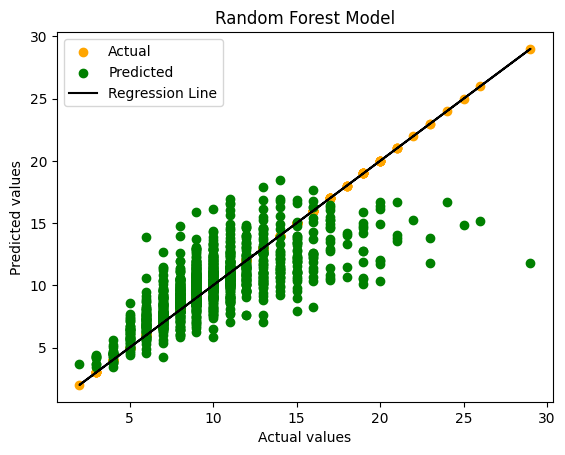

In [ ]:
def random_forest(y_test, y_pred):
  plt.scatter(y_test, y_test, color='orange', label='Actual')
  plt.scatter(y_test, y_pred, color='green', label='Predicted')
  plt.plot(y_test, y_test, color='black', label='Regression Line')
  plt.title('Random Forest Model')
  plt.xlabel('Actual values')
  plt.ylabel('Predicted values')
  plt.legend()

random_forest(y_test, y_pred)

plt.show()